<a href="https://colab.research.google.com/github/Darren7-pixel/Tugas_Kelompok_Fresh_and_Rotten_Fruit_Detection/blob/main/Tugas_Kelompok_Fresh_and_Rotten_Fruit_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dan import library
!pip install roboflow ultralytics opencv-python --quiet
from roboflow import Roboflow
from ultralytics import YOLO
import os, json, cv2, random
from IPython.display import Image, display
import matplotlib.pyplot as plt
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# Download dataset dari Roboflow
rf = Roboflow(api_key="CgHOrFV3x7O9d4Dv01l4")
project = rf.workspace("darren-eyvgt").project("fruit-detection-okyqf")
dataset = project.version(1).download("yolov8")

print("📂 Lokasi dataset:", dataset.location)
!ls -R {dataset.location}


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruit-Detection-1 in yolov8:: 100%|██████████| 246/246 [00:00<00:00, 5010.48it/s]


📂 Lokasi dataset: /content/Fruit-Detection-1
/content/Fruit-Detection-1:
data.yaml  README.dataset.txt  README.roboflow.txt  train

/content/Fruit-Detection-1/train:
images	labels

/content/Fruit-Detection-1/train/images:
Screen-Shot-2018-06-08-at-5_07_52-PM_png.rf.bad1073b8f6a3ec518a0886845c30b07.jpg
Screen-Shot-2018-06-08-at-5_08_37-PM_png.rf.0ed054aad5c8b8c5082c8158febbea7e.jpg
Screen-Shot-2018-06-08-at-5_09_17-PM_png.rf.babe3bd6c2a4e3b0ab2966e55387c943.jpg
translation_Screen-Shot-2018-06-08-at-2_51_28-PM_png.rf.64bc05ff5b187d066ec2898b03fa6243.jpg
translation_Screen-Shot-2018-06-08-at-2_52_57-PM_png.rf.5c5c99503e34e02eb76058bfa724ded7.jpg
vertical_flip_Screen-Shot-2018-06-07-at-2_15_50-PM_png.rf.5e6d6dedb8915f77c2accf4abfbcf2c1.jpg
vertical_flip_Screen-Shot-2018-06-07-at-2_16_18-PM_png.rf.cc9b42a4f0bc460468af5bfb2869d1ef.jpg
vertical_flip_Screen-Shot-2018-06-07-at-2_17_15-PM_png.rf.bdc0551aa9d560456e3ad696719d02fb.jpg
vertical_flip_Screen-Shot-2018-06-07-at-2_20_04-PM_png.rf.e085d2

In [9]:
#Perbaiki data.yaml (jika tidak ada val:)
yaml_path = os.path.join(dataset.location, "data.yaml")

with open(yaml_path, "r") as f:
    yaml_data = f.read()

if "val:" not in yaml_data:
    yaml_data += f"\nval: {os.path.join(dataset.location, 'train/images')}\n"
else:
    yaml_data = yaml_data.replace("valid", "train")  # ganti invalid folder

with open(yaml_path, "w") as f:
    f.write(yaml_data)

print("\n✅ data.yaml sudah diperbaiki:")
!cat {yaml_path}



✅ data.yaml sudah diperbaiki:
names:
- freshapple
- freshbanana
- freshorange
- rottenapple
- rottenbanana
- rottenorange
nc: 6
roboflow:
  license: CC BY 4.0
  project: fruit-detection-okyqf
  url: https://universe.roboflow.com/darren-eyvgt/fruit-detection-okyqf/dataset/1
  version: 1
  workspace: darren-eyvgt
test: ../test/images
train: ../train/images
val: ../train/images


In [31]:
# Training YOLOv8
model = YOLO("yolov8n.pt")

results = model.train(
    data=yaml_path,
    epochs=30,
    imgsz=640,
    batch=8,
    name="fruit_detector_fixed_final",
    project="runs/train"
)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Fruit-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fruit_detector_fixed_final4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

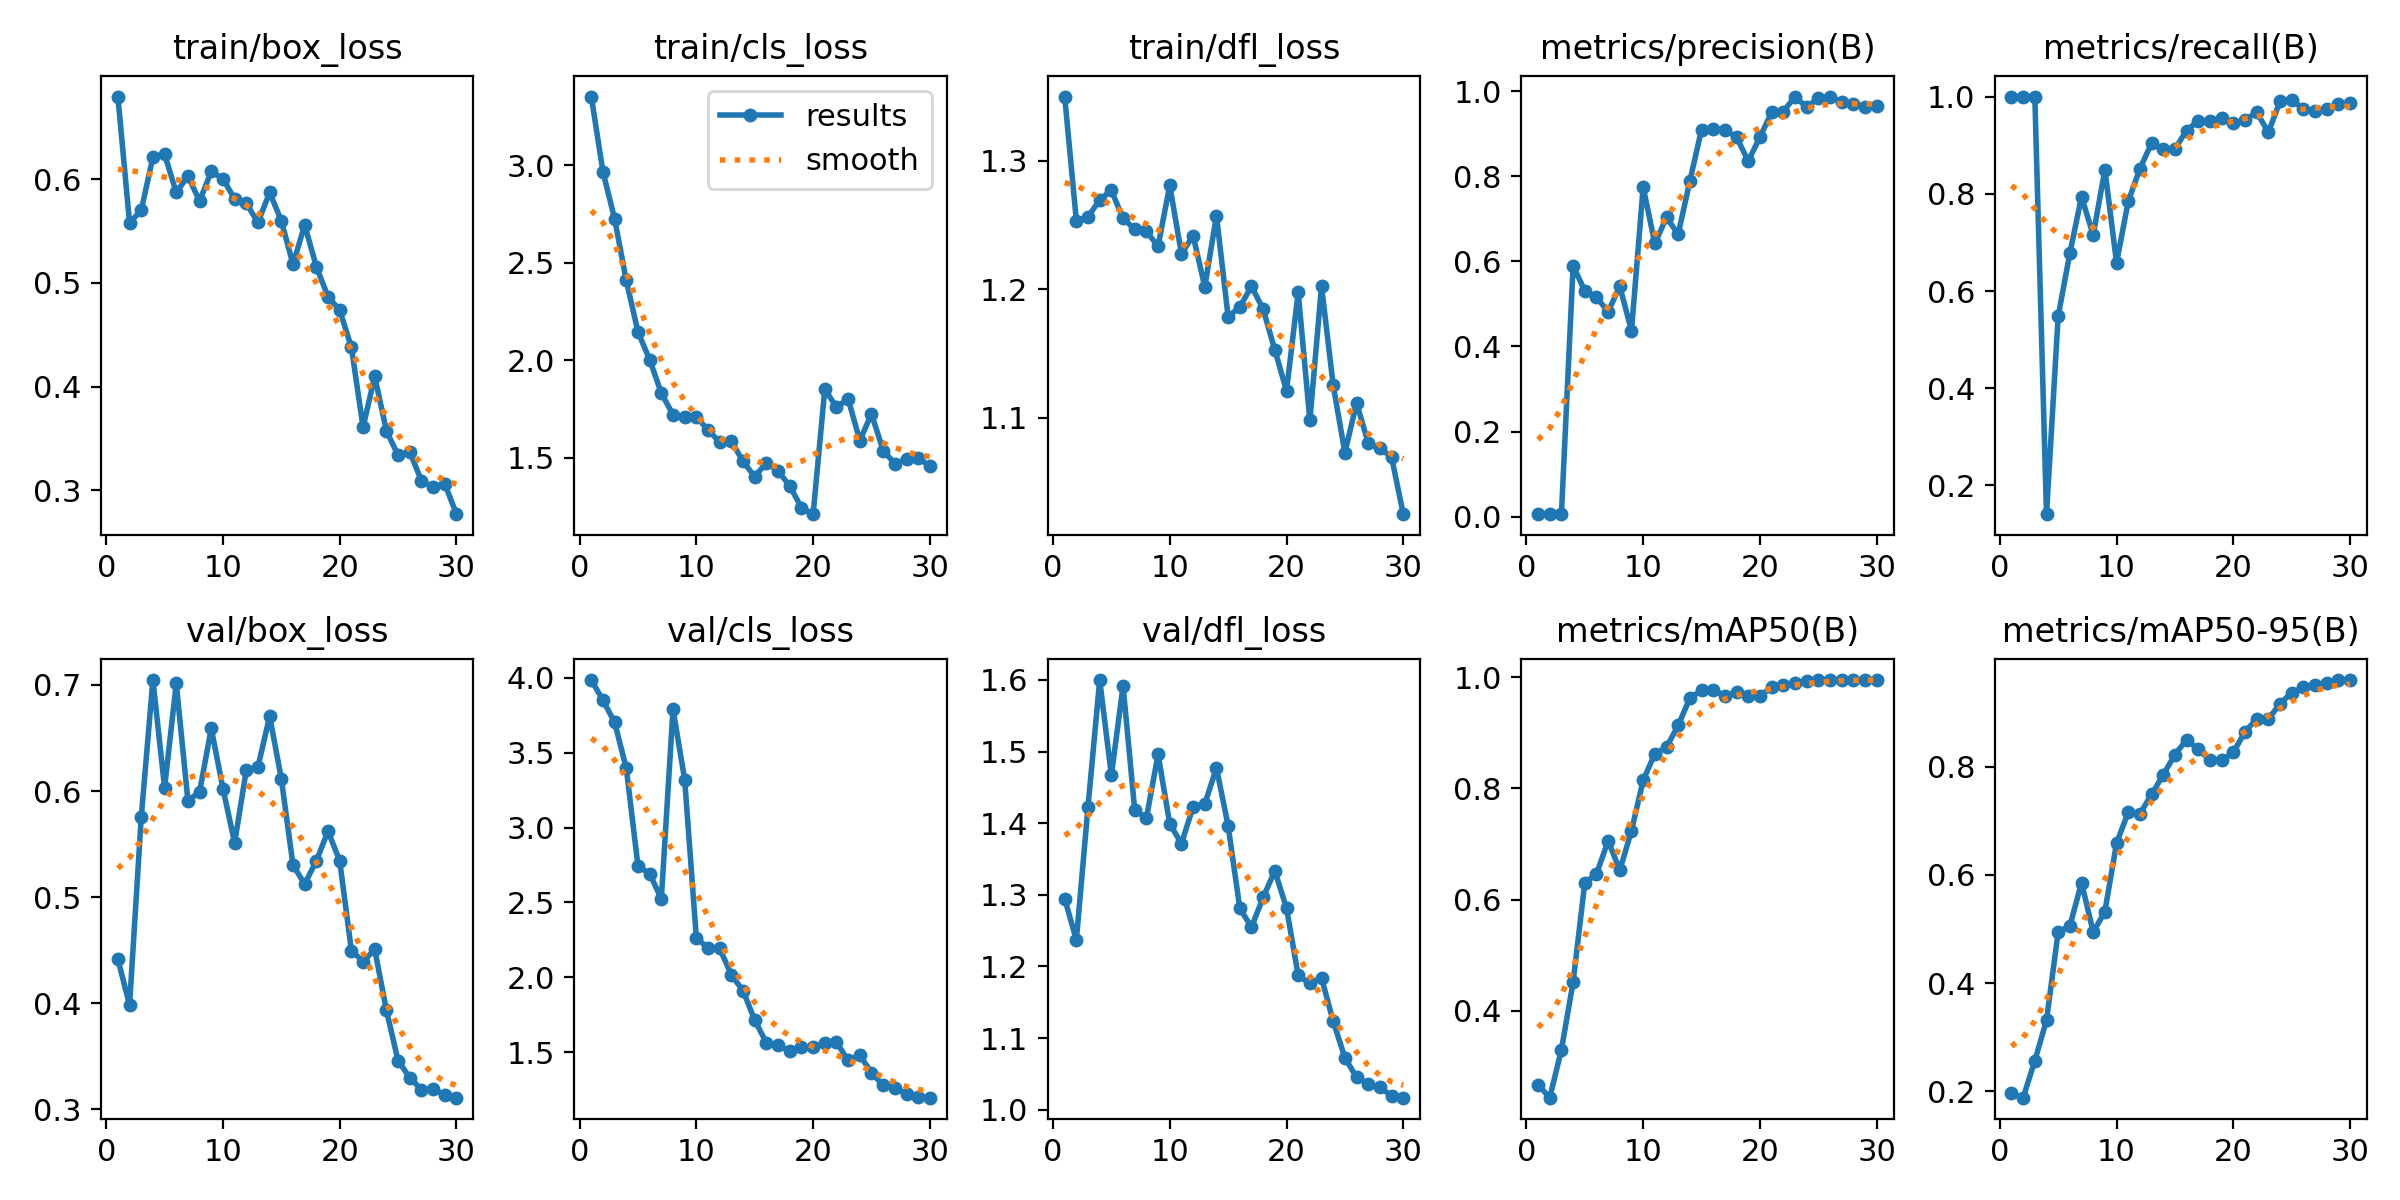

In [32]:
train_dir = "/content/runs/train/fruit_detector_fixed_final4"

if os.path.exists(os.path.join(train_dir, "results.png")):
    display(Image(filename=os.path.join(train_dir, "results.png")))
elif os.path.exists(os.path.join(train_dir, "results.csv")):
    df = pd.read_csv(os.path.join(train_dir, "results.csv"))
    plt.figure(figsize=(8,5))
    plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
    plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
    plt.plot(df["epoch"], df["metrics/mAP50"], label="mAP50")
    plt.title("Training Performance")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("⚠️ File results.png atau results.csv tidak ditemukan di:", train_dir)


In [33]:
# Evaluasi model terbaik

best_model_path = os.path.join(train_dir, "weights", "best.pt")
if not os.path.exists(best_model_path):
    raise FileNotFoundError(f"❌ Model tidak ditemukan di {best_model_path}")

model = YOLO(best_model_path)
metrics = model.val()

metrics_dict = metrics.results_dict if hasattr(metrics, "results_dict") else {}
metrics_path = os.path.join(train_dir, "metrics.json")

with open(metrics_path, "w") as f:
    json.dump(metrics_dict, f, indent=4)

print("\n✅ File evaluasi disimpan di:", metrics_path)
print(json.dumps(metrics_dict, indent=4))


Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 638.1±159.6 MB/s, size: 24.4 KB)
val: Scanning /content/Fruit-Detection-1/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 120/120 61.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 0.2it/s 33.5s
                   all        120        128      0.964      0.987      0.995      0.959
            freshapple         20         20          1      0.921      0.995      0.995
           freshbanana         20         21      0.982          1      0.995      0.929
           freshorange         20         26      0.953          1      0.995      0.969
           rottenapple         20         20      0.863          1      0.995      0.973
          rottenbanana         20     


🔍 Menampilkan 5 contoh gambar hasil deteksi:

🖼️ Gambar 1: /content/Fruit-Detection-1/train/images/vertical_flip_Screen-Shot-2018-06-08-at-5_29_18-PM_png.rf.d1ffebee186bd0e59230dd2f911c4cad.jpg
Results saved to /content/runs/detect/predict2


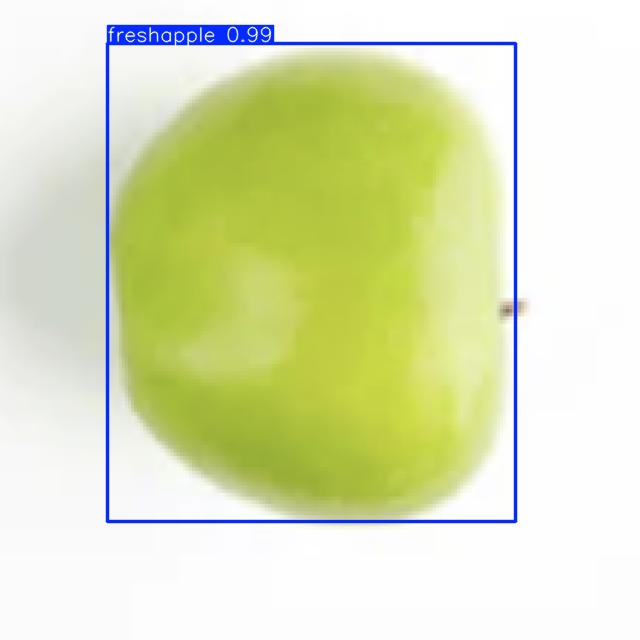

🖼️ Gambar 2: /content/Fruit-Detection-1/train/images/vertical_flip_Screen-Shot-2018-06-07-at-2_37_43-PM_png.rf.6929ca8d209fc7729c21cf7044731ebe.jpg
Results saved to /content/runs/detect/predict2


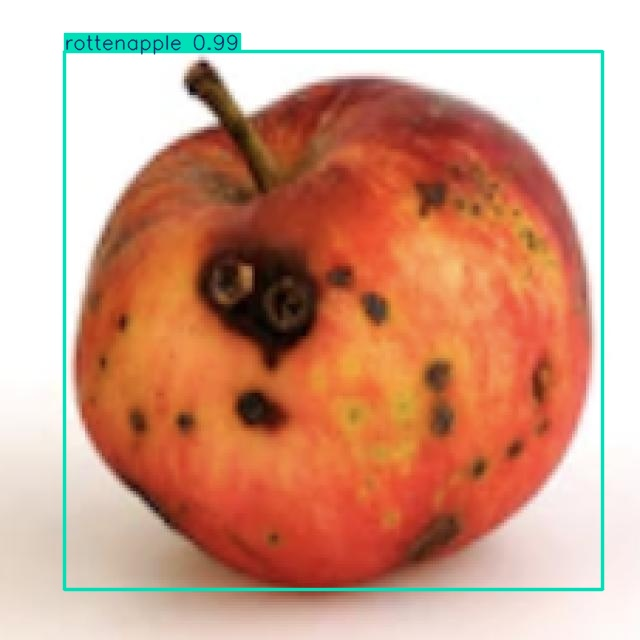

🖼️ Gambar 3: /content/Fruit-Detection-1/train/images/vertical_flip_Screen-Shot-2018-06-12-at-11_31_44-PM_png.rf.80c9ca8ff283cb4b30ba2d671a977289.jpg
Results saved to /content/runs/detect/predict2


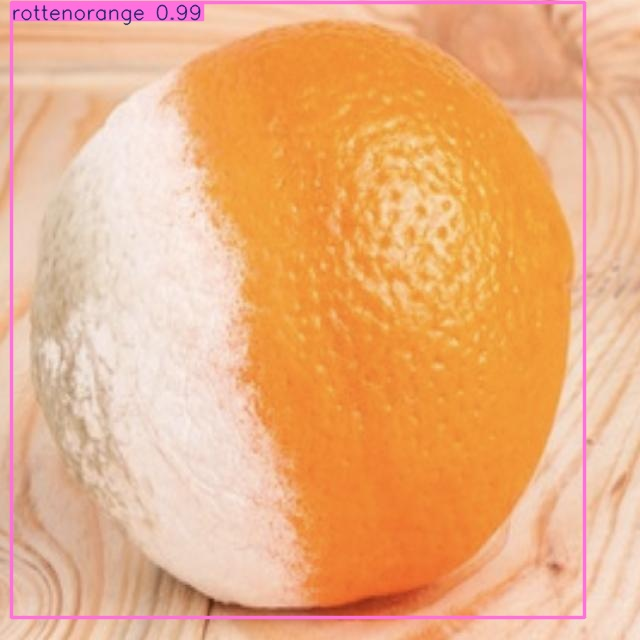

🖼️ Gambar 4: /content/Fruit-Detection-1/train/images/vertical_flip_Screen-Shot-2018-06-07-at-2_43_07-PM_png.rf.0b57a7eb0c4f41a70adbee9875d9b34b.jpg
Results saved to /content/runs/detect/predict2


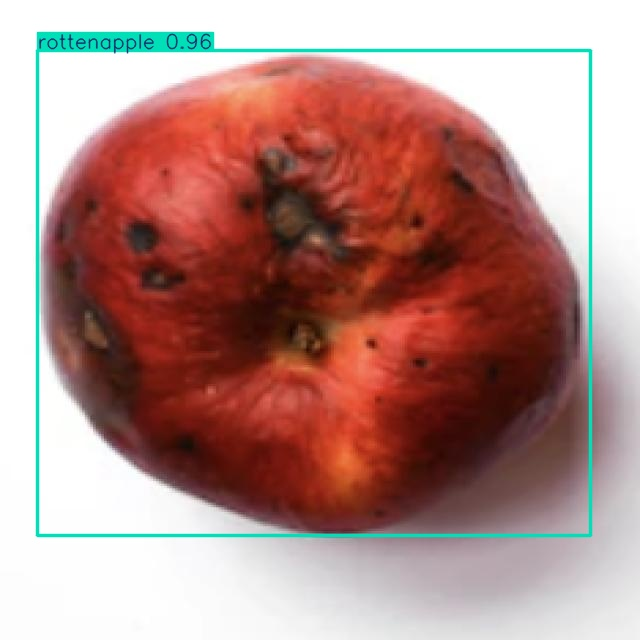

🖼️ Gambar 5: /content/Fruit-Detection-1/train/images/vertical_flip_Screen-Shot-2018-06-12-at-9_25_23-PM_png.rf.40ac2634d41c850d4036166f6493aba1.jpg
Results saved to /content/runs/detect/predict2


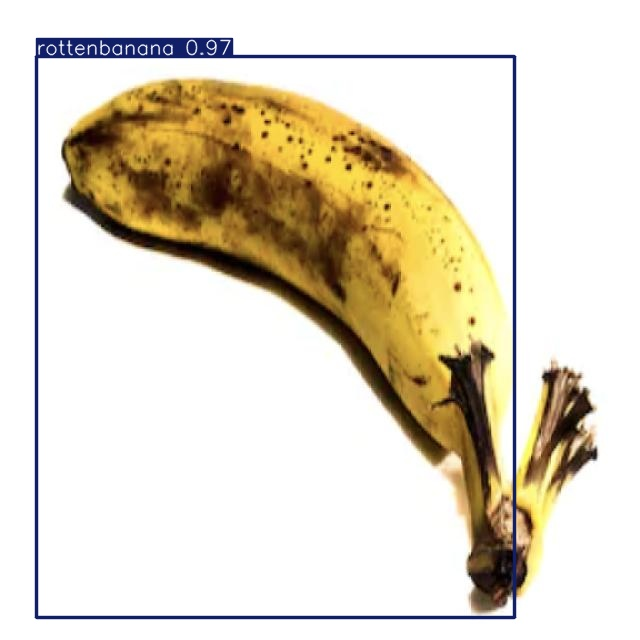

In [36]:
# Prediksi contoh gambar
test_dir = os.path.join(dataset.location, "train/images")

if os.path.exists(test_dir):
    sample_imgs = random.sample(os.listdir(test_dir), min(5, len(os.listdir(test_dir))))  # ambil max 5
    print(f"\n🔍 Menampilkan {len(sample_imgs)} contoh gambar hasil deteksi:\n")

    for i, img_name in enumerate(sample_imgs, start=1):
        sample_path = os.path.join(test_dir, img_name)
        print(f"🖼️ Gambar {i}: {sample_path}")

        results = model.predict(source=sample_path, conf=0.5, save=True, verbose=False)

        # ambil path hasil prediksi
        result_img_path = os.path.join(results[0].save_dir, os.path.basename(sample_path))

        if os.path.exists(result_img_path):
            display(Image(filename=result_img_path))
        else:
            print("⚠️ Gambar hasil prediksi tidak ditemukan:", result_img_path)
else:
    print("⚠️ Folder train/images tidak ditemukan.")


📸 Silakan ambil gambar buah via webcam:


<IPython.core.display.Javascript object>

Gambar tersimpan di: photo.jpg

image 1/1 /content/photo.jpg: 480x640 1 freshapple, 195.6ms
Speed: 2.9ms preprocess, 195.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict2


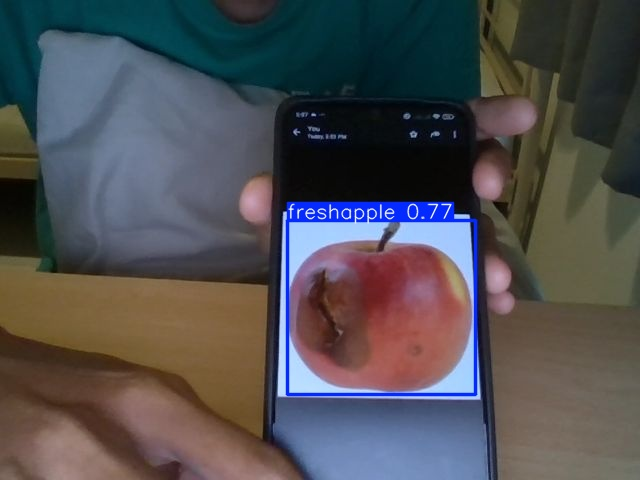

In [35]:
#Tes Kamera (Real-Time Detection)

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image as PILImage
import io

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📷 Ambil Gambar';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Tunggu klik tombol
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Ambil gambar dari webcam
print("\n📸 Silakan ambil gambar buah via webcam:")
try:
    image_path = take_photo()
    print(f"Gambar tersimpan di: {image_path}")

    results = model.predict(source=image_path, conf=0.5, save=True)
    result_path = results[0].save_dir + "/" + os.path.basename(image_path)
    display(Image(filename=result_path))
except Exception as e:
    print("⚠️ Kamera tidak bisa diakses atau izin belum diberikan:", e)